In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
 # 1. Simulate Dataset
 np.random.seed(42)
 X = np.random.rand(1000, 50)
 y = np.random.randint(0, 2, 1000)
 df = pd.DataFrame(X, columns=[f"Gene_{i}" for i in range(1,51)])
 df["Label"] = y
 print(df.head())


# 
# Why use machine learning on genomic data?

# A: Because genomic datasets are huge and complex — ML helps find hidden patterns that can predict diseases, classify cancer types, or suggest biomarkers for diagnosis.
# Genomic Data → massive datasets containing gene expression levels, DNA sequences, or mutations.

# Machine Learning here helps to:

# Detect diseases based on gene patterns

# Predict treatment responses

# Classify cancer subtypes or genetic traits

# 1000 samples (rows), each with 50 genes (columns).

# y is a binary label (0 = healthy, 1 = diseased).

# np.random.seed(42) ensures reproducibility (you’ll always get the same random numbers).

     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0  0.374540  0.950714  0.731994  0.598658  0.156019  0.155995  0.058084   
1  0.969585  0.775133  0.939499  0.894827  0.597900  0.921874  0.088493   
2  0.031429  0.636410  0.314356  0.508571  0.907566  0.249292  0.410383   
3  0.908266  0.239562  0.144895  0.489453  0.985650  0.242055  0.672136   
4  0.642032  0.084140  0.161629  0.898554  0.606429  0.009197  0.101472   

     Gene_8    Gene_9   Gene_10  ...   Gene_42   Gene_43   Gene_44   Gene_45  \
0  0.866176  0.601115  0.708073  ...  0.495177  0.034389  0.909320  0.258780   
1  0.195983  0.045227  0.325330  ...  0.713245  0.760785  0.561277  0.770967   
2  0.755551  0.228798  0.076980  ...  0.251782  0.497249  0.300878  0.284840   
3  0.761620  0.237638  0.728216  ...  0.897216  0.900418  0.633101  0.339030   
4  0.663502  0.005062  0.160808  ...  0.953929  0.914864  0.370159  0.015457   

    Gene_46   Gene_47   Gene_48   Gene_49   Gene_50  Label  
0  0.66

In [5]:
# Splitting Data for Training & Testing
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Label", axis=1), df["Label"], test_size=0.2, random_state=42)


# 80% of data used for training models

# 20% for testing their accuracy later

In [ ]:
 # 2. Train Models
 rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
 svm = SVC(kernel="linear").fit(X_train, y_train)

# Random Forest (ensemble of decision trees)

# SVM (finds hyperplane that separates two classes)

# Both trained on the training dataset.


# Algorithm	Why It’s Used	
# Random Forest	Handles complex, non-linear data well	Robust, interpretable, avoids overfitting
# SVM (Support Vector Machine)	Finds optimal boundary (hyperplane)	Great for small, high-dimensional datasets




# Q3: What’s the difference between Random Forest and SVM?

# A:

# Random Forest: Ensemble of decision trees; great for handling large, noisy datasets.

# SVM: Finds a boundary between classes; performs best on smaller, clean, high-dimensional data.

In [8]:
# Making Predictions
rf_pred, svm_pred = rf.predict(X_test), svm.predict(X_test)


# The models predict the labels for test data.

In [9]:
# Evaluating Models



def evaluate(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))




# Accuracy – total correct predictions / total samples

# Precision – out of predicted positives, how many were correct

# Recall – out of actual positives, how many were detected

# F1 Score – harmonic mean of precision & recall balance the model 

Text(0.5, 1.0, 'Top 10 Important Genomic Features')

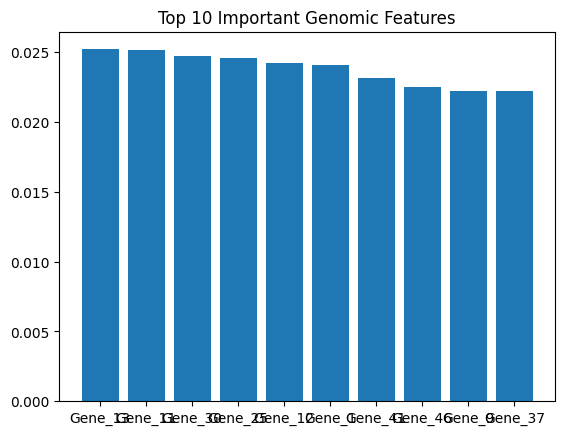

In [15]:
# Confusion Matrices

def plot_cm(y_true, y_pred, title):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d",
                cmap="Blues", xticklabels=["Healthy","Disease"], yticklabels=["Healthy","Disease"])

# Feature Importance (Random Forest only)
imp = rf.feature_importances_
idx = np.argsort(imp)[-10:][::-1]
plt.bar(range(10), imp[idx], tick_label=[f"Gene_{i+1}" for i in idx])
plt.title("Top 10 Important Genomic Features")





#  Diagonal values = correct predictions,
# Off-diagonal = misclassifications.